In [1]:
import umap
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

/Users/andy/anaconda3/envs/datathon/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# user_embedding_svd_ability_seen_beh

In [2]:
eb_svd_wt_b = '../data/user_embedding_svd_ability_seen_beh.csv'
df_eb_svd_wt_b = pd.read_csv(eb_svd_wt_b)
df_eb_svd_wt_b.head()

,user_id,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,...,emb_89,emb_90,emb_91,emb_92,emb_93,emb_94,emb_95,emb_96,emb_97,emb_98
0,u:0X2,0.134173,0.017224,0.000430,0.082584,-0.091514,0.105019,0.012018,0.029548,0.055245,...,0.039876,-0.027420,-0.002762,-0.025802,-0.046068,-0.046665,-0.052775,-0.042475,-0.079291,0.185508
1,u:0b,0.135185,0.023528,-0.122309,-0.025011,0.221841,0.397188,-0.167680,-0.174717,0.065515,...,0.006184,0.011341,-0.182331,-0.083404,0.037596,-0.200512,-0.102030,-0.045002,-0.064507,-0.076653
2,u:0xw,0.515997,-0.099454,-0.299467,-0.072129,-0.345844,-0.066694,-0.069486,0.203094,-0.083272,...,-0.037616,0.033427,0.016587,-0.003602,0.033149,0.017227,0.020933,-0.010363,0.037636,-0.043611
3,u:1EH,0.432452,0.247924,0.207314,0.094222,-0.114899,-0.066962,-0.041860,0.030317,0.110288,...,0.016686,0.001422,-0.008176,0.048674,-0.030687,-0.003511,0.061484,-0.021030,-0.000775,-0.053916
4,u:1gx,0.531505,0.300686,0.044307,0.022798,-0.015802,0.021950,0.219253,0.219306,-0.013960,...,-0.017098,0.009588,-0.019033,0.028222,-0.011925,0.023184,-0.035344,-0.018533,0.014233,0.009173


In [3]:
X = df_eb_svd_wt_b.drop(columns="user_id").to_numpy()  # shape (2709, 99)
user_ids = df_eb_svd_wt_b["user_id"].values

In [4]:
def show_result(df_2d: pd.DataFrame, df_3d: pd.DataFrame, mode: str='PCA'):
    fig = plt.figure(figsize=(16,6))

    ax1 = fig.add_subplot(1, 2, 1)  # 1 row, 2 cols, subplot 1
    sns.scatterplot(data=df_2d, x=f"{mode}1", y=f"{mode}2", ax=ax1, s=20, alpha=0.7)
    ax1.set_title(f"User Embedding {mode} (2D)")
    ax1.set_xlabel("axis 1")
    ax1.set_ylabel("axis 2")

    ax2 = fig.add_subplot(1, 2, 2, projection='3d')  # subplot 2, 3D
    ax2.scatter(
        df_3d[f"{mode}1"], df_3d[f"{mode}2"], df_3d[f"{mode}3"],
        s=20, alpha=0.6
    )
    ax2.set_title(f"3D {mode} of User Embeddings")
    ax2.set_xlabel("axis 1")
    ax2.set_ylabel("axis 2")
    ax2.set_zlabel("axis 3")

    plt.tight_layout()
    plt.show()

### PCA

Explained variance ratio (2D): 0.33627992048817595


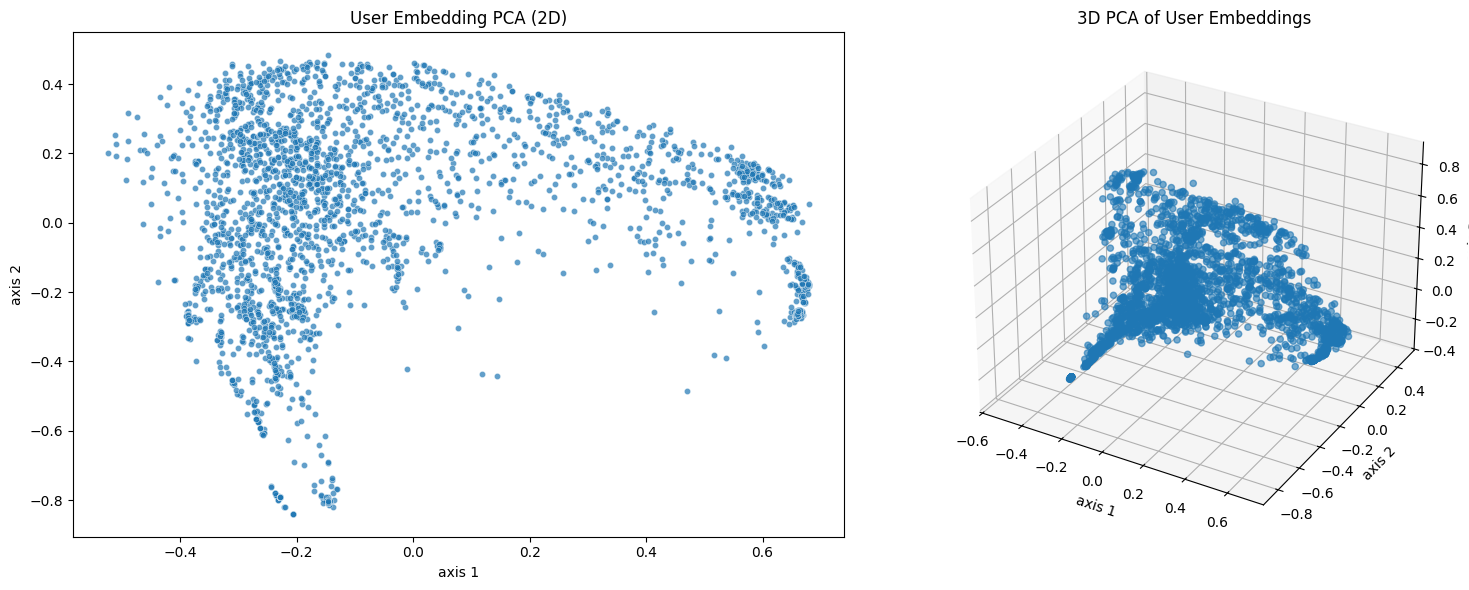

In [5]:
pca = PCA(n_components=3, random_state=42)
X_pca = pca.fit_transform(X)
print("Explained variance ratio (2D):", pca.explained_variance_ratio_.sum())

df_pca = pd.DataFrame({
    "user_id": user_ids,
    "PCA1": X_pca[:,0],
    "PCA2": X_pca[:,1],
    "PCA3": X_pca[:,2]
})

show_result(df_pca, df_pca, mode='PCA')

### UMAP

/Users/andy/anaconda3/envs/datathon/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/andy/anaconda3/envs/datathon/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


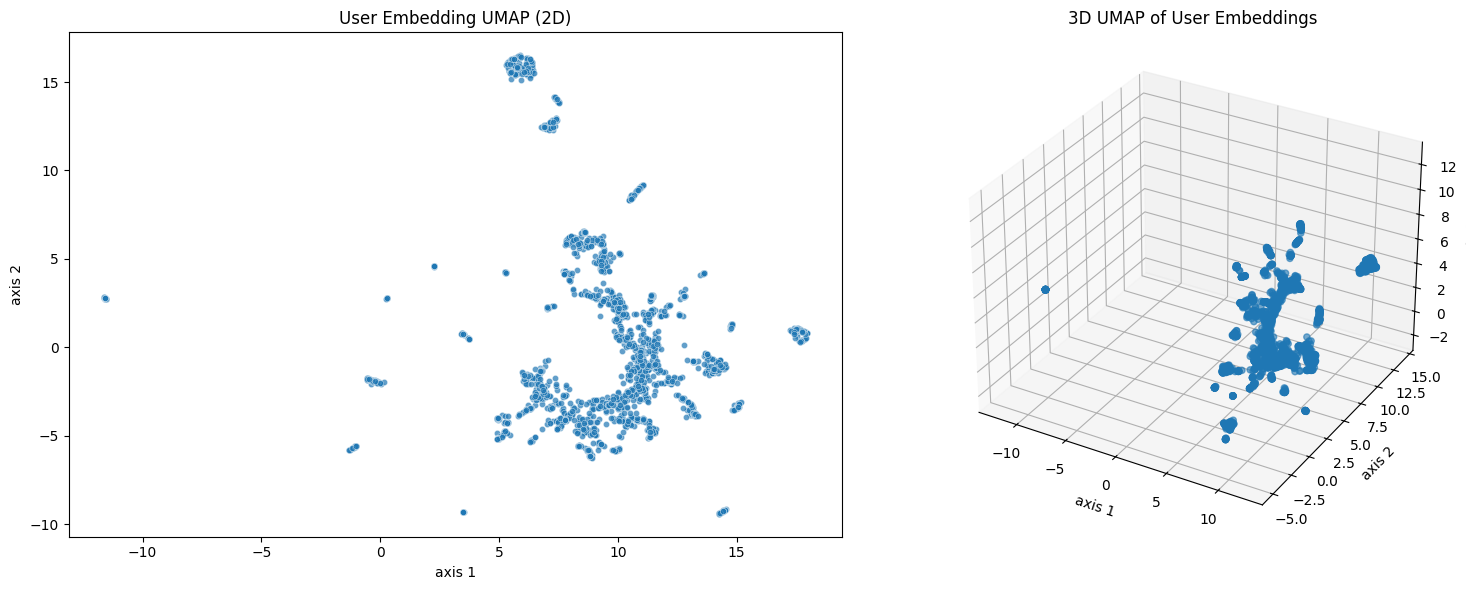

In [6]:
from umap import UMAP
umap_2d = UMAP(n_components=2, random_state=42, n_neighbors=30, min_dist=0.1)
X_umap = umap_2d.fit_transform(X)

df_umap_2d = pd.DataFrame({
    "user_id": user_ids,
    "UMAP1": X_umap[:,0],
    "UMAP2": X_umap[:,1]
})

umap_3d = UMAP(n_components=3, random_state=42, n_neighbors=30, min_dist=0.1)
X_umap = umap_3d.fit_transform(X)

df_umap_3d = pd.DataFrame({
    "user_id": user_ids,
    "UMAP1": X_umap[:,0],
    "UMAP2": X_umap[:,1],
    "UMAP3": X_umap[:,2],
})

show_result(df_umap_2d, df_umap_3d, mode='UMAP')

### t-SNE

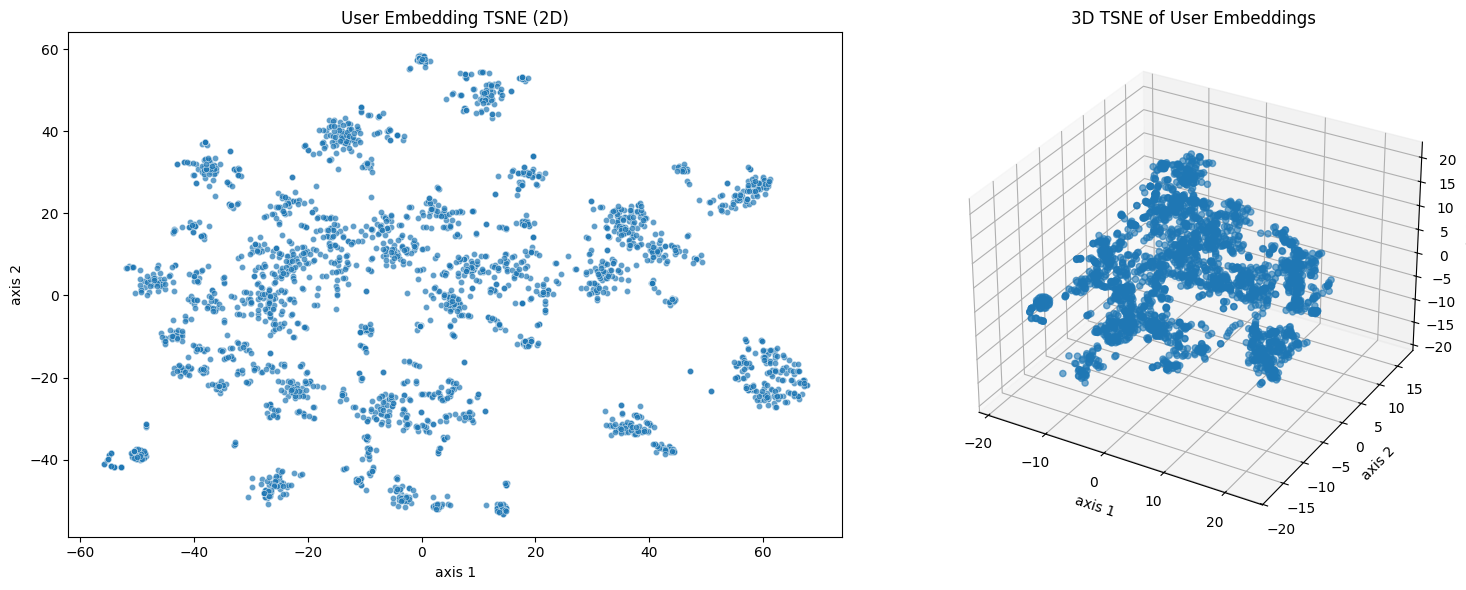

In [7]:
tsne_2d = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200)
X_tsne = tsne_2d.fit_transform(X)

df_tsne_2d = pd.DataFrame({
    "user_id": user_ids,
    "TSNE1": X_tsne[:,0],
    "TSNE2": X_tsne[:,1]
})

tsne_3d = TSNE(n_components=3, random_state=42, perplexity=30, learning_rate=200)
X_tsne = tsne_3d.fit_transform(X)

df_tsne_3d = pd.DataFrame({
    "user_id": user_ids,
    "TSNE1": X_tsne[:,0],
    "TSNE2": X_tsne[:,1],
    "TSNE3": X_tsne[:,2]
})

show_result(df_tsne_2d, df_tsne_3d, mode='TSNE')

---

# user_embedding_svd_ability_seen_beh_B

In [8]:
eb_svd = '../data/user_embedding_svd_ability_seen_beh_B.csv'
df_eb_svd = pd.read_csv(eb_svd)
df_eb_svd.head()

,user_id,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,...,emb_89,emb_90,emb_91,emb_92,emb_93,emb_94,emb_95,emb_96,emb_97,emb_98
0,u:0X2,0.040384,0.010686,-0.008548,0.009608,-0.017136,-0.039370,0.021499,0.013653,0.054109,...,0.056749,-0.039023,-0.003930,-0.036720,-0.065562,-0.066411,-0.075106,-0.060448,-0.112842,0.264005
1,u:0b,0.019760,-0.003862,-0.015594,-0.013942,-0.010056,-0.056815,0.010692,-0.028347,0.051160,...,0.007812,0.014327,-0.230332,-0.105360,0.047493,-0.253298,-0.128891,-0.056850,-0.081489,-0.096833
2,u:0xw,0.259444,-0.067651,-0.020491,-0.099860,-0.181001,0.037509,0.058685,0.090447,-0.122750,...,-0.057247,0.050871,0.025243,-0.005481,0.050449,0.026217,0.031857,-0.015770,0.057277,-0.066370
3,u:1EH,0.272376,0.107564,0.040468,0.045240,0.005311,0.070422,0.013381,0.003112,0.037268,...,0.021219,0.001809,-0.010396,0.061895,-0.039023,-0.004465,0.078185,-0.026743,-0.000985,-0.068561
4,u:1gx,0.303617,0.120875,-0.012170,-0.054395,0.097187,-0.015223,-0.005583,0.065647,-0.004901,...,-0.022705,0.012732,-0.025275,0.037477,-0.015836,0.030787,-0.046934,-0.024611,0.018900,0.012182


In [9]:
X = df_eb_svd.drop(columns="user_id").to_numpy()  # shape (2709, 99)
user_ids = df_eb_svd["user_id"].values

### PCA

Explained variance ratio (2D): 0.3650182605449138


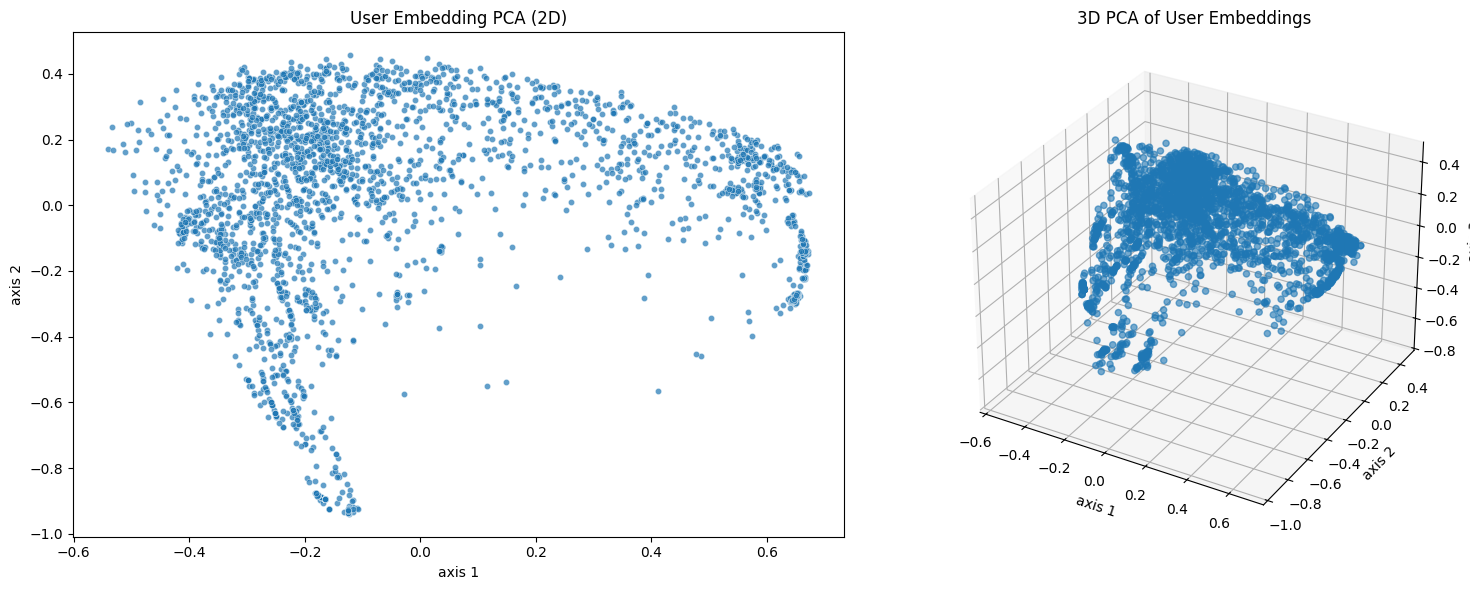

In [10]:
pca = PCA(n_components=3, random_state=42)
X_pca = pca.fit_transform(X)
print("Explained variance ratio (2D):", pca.explained_variance_ratio_.sum())

df_pca = pd.DataFrame({
    "user_id": user_ids,
    "PCA1": X_pca[:,0],
    "PCA2": X_pca[:,1],
    "PCA3": X_pca[:,2]
})

show_result(df_pca, df_pca, mode="PCA")

### UMAP

/Users/andy/anaconda3/envs/datathon/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/andy/anaconda3/envs/datathon/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


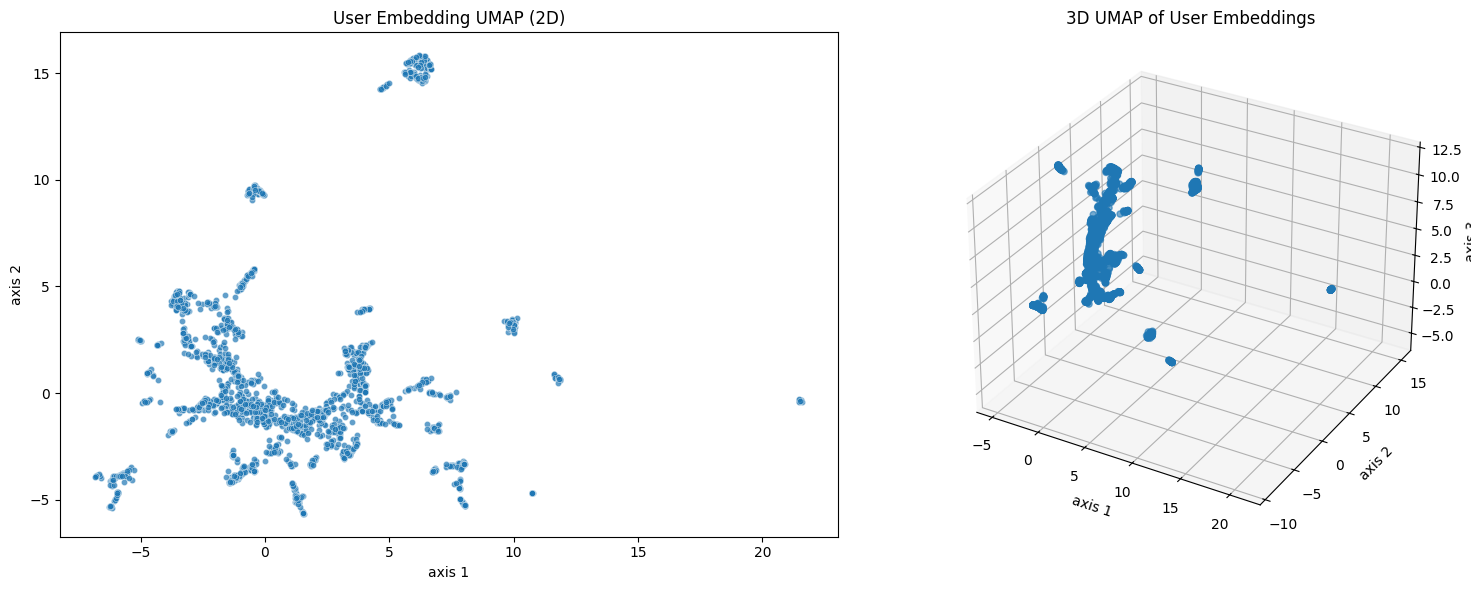

In [11]:
from umap import UMAP
umap_2d = UMAP(n_components=2, random_state=42, n_neighbors=30, min_dist=0.1)
X_umap = umap_2d.fit_transform(X)

df_umap_2d = pd.DataFrame({
    "user_id": user_ids,
    "UMAP1": X_umap[:,0],
    "UMAP2": X_umap[:,1]
})

umap_3d = UMAP(n_components=3, random_state=42, n_neighbors=30, min_dist=0.1)
X_umap = umap_3d.fit_transform(X)

df_umap_3d = pd.DataFrame({
    "user_id": user_ids,
    "UMAP1": X_umap[:,0],
    "UMAP2": X_umap[:,1],
    "UMAP3": X_umap[:,2],
})

show_result(df_umap_2d, df_umap_3d, mode="UMAP")

### t-SNE

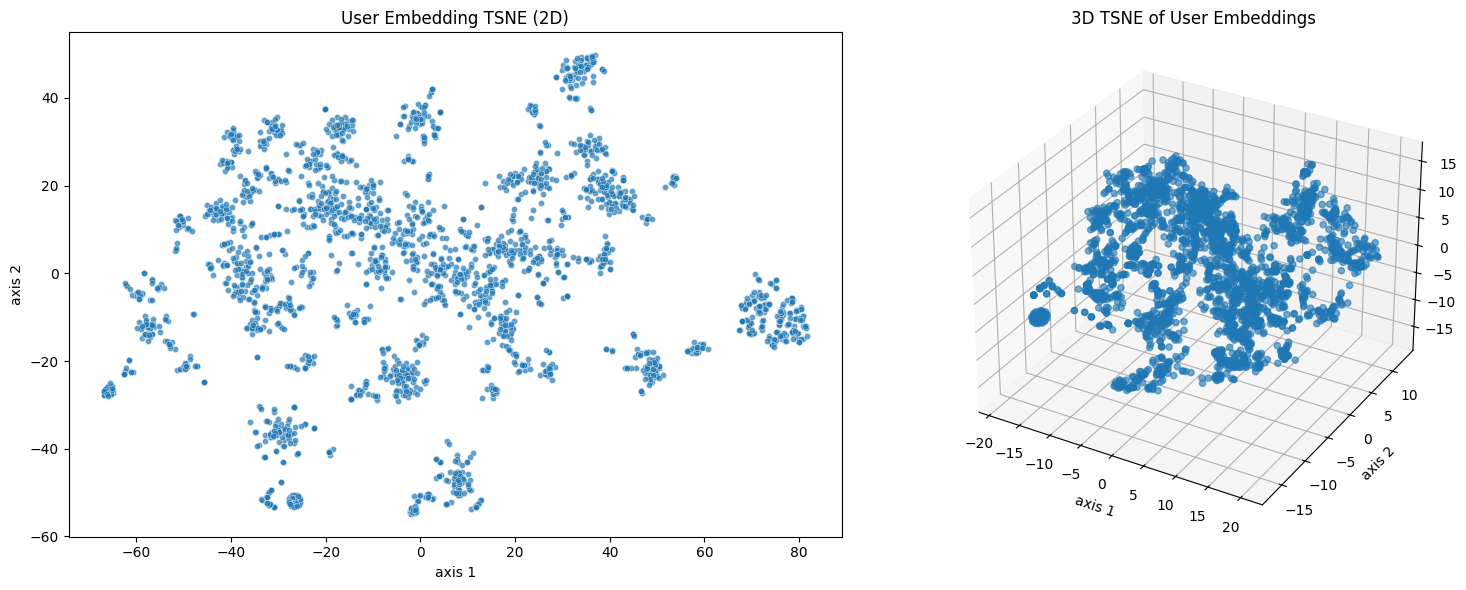

In [12]:
tsne_2d = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200)
X_tsne = tsne_2d.fit_transform(X)

df_tsne_2d = pd.DataFrame({
    "user_id": user_ids,
    "TSNE1": X_tsne[:,0],
    "TSNE2": X_tsne[:,1]
})

tsne_3d = TSNE(n_components=3, random_state=42, perplexity=30, learning_rate=200)
X_tsne = tsne_3d.fit_transform(X)

df_tsne_3d = pd.DataFrame({
    "user_id": user_ids,
    "TSNE1": X_tsne[:,0],
    "TSNE2": X_tsne[:,1],
    "TSNE3": X_tsne[:,2]
})

show_result(df_tsne_2d, df_tsne_3d, mode='TSNE')